In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datenspende.utils import query_ch_df, query_pg_df
import datetime
from datetime import date
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
lc_u = np.load('uid_per_shb_fatigue(1).npy')

In [11]:
len(lc_u)

134

In [3]:
# get age
def get_demo(user_ids):
    
    if isinstance(user_ids, int) or isinstance(user_ids, np.int64):
        formatter = f'({user_ids})'
    elif len(user_ids) == 1:
        formatter = f'({user_ids[0]})'
    else:
        formatter = tuple(user_ids) 
    
    
    
    query = f"""
    SELECT 
        user_id, salutation, birth_date, weight, height, creation_timestamp
    FROM 
        rocs.datenspende.users
    WHERE 
        users.user_id IN {formatter} 
   
    """ 

    users = query_pg_df(query)
    users.creation_timestamp = pd.to_datetime(users['creation_timestamp'],unit='ms') 
    users.creation_timestamp = users.creation_timestamp.dt.date
    users['age'] = np.floor((2023 + 1 / 12) - users['birth_date'] + 2.5)

    
    
    return users

In [4]:
# get sex
def get_info(user_ids):
    
    # Make sure that the IN-condition for the SQL query either takes the form '(userid)' in the case
    # of a single requested user id or '(userid1, userid2, ..., useridN)' in the case of multiple
    # requested user ids
    if isinstance(user_ids, int) or isinstance(user_ids, np.int64):
        formatter = f'({user_ids})'
    elif len(user_ids) == 1:
        formatter = f'({user_ids[0]})'
    else:
        formatter = tuple(user_ids)
    
    
    
    qu = f"""
    select
        
        a.user_id,
        a.created_at,
        a.question,
        a.element
        
    from 
        rocs.datenspende.answers a
    where 
        a.user_id IN {formatter}
    AND
        a.question = 127
        

    """

    users = query_pg_df(qu)
    users.created_at = pd.to_datetime(users['created_at'],unit='ms')
    users.created_at = users.created_at.dt.date
    
    
    return users

In [5]:
def get_vacc(user_ids):
    
    # Make sure that the IN-condition for the SQL query either takes the form '(userid)' in the case
    # of a single requested user id or '(userid1, userid2, ..., useridN)' in the case of multiple
    # requested user ids
    if isinstance(user_ids, int) or isinstance(user_ids, np.int64):
        formatter = f'({user_ids})'
    elif len(user_ids) == 1:
        formatter = f'({user_ids[0]})'
    else:
        formatter = tuple(user_ids)
    
    
    
    qu = f"""
    select
        
        a.user_id,
        a.created_at,
        a.question,
        a.element
        
    from 
        rocs.datenspende.answers a
    where 
        a.user_id IN {formatter}
    AND
        a.question = 121
        

    """

    users = query_pg_df(qu)
    users.created_at = pd.to_datetime(users['created_at'],unit='ms')
    users.created_at = users.created_at.dt.date
    
    
    return users

In [6]:
# get sex
def get_info(user_ids):
    
    # Make sure that the IN-condition for the SQL query either takes the form '(userid)' in the case
    # of a single requested user id or '(userid1, userid2, ..., useridN)' in the case of multiple
    # requested user ids
    if isinstance(user_ids, int) or isinstance(user_ids, np.int64):
        formatter = f'({user_ids})'
    elif len(user_ids) == 1:
        formatter = f'({user_ids[0]})'
    else:
        formatter = tuple(user_ids)
    
    
    
    qu = f"""
    select
        
        a.user_id,
        a.created_at,
        a.question,
        a.element
        
    from 
        rocs.datenspende.answers a
    where 
        a.user_id IN {formatter}
    AND
        a.question = 127
        

    """

    users = query_pg_df(qu)
    users.created_at = pd.to_datetime(users['created_at'],unit='ms')
    users.created_at = users.created_at.dt.date
    
    
    return users

In [7]:
def get_vitals(user_ids):
    
    # Make sure that the IN-condition for the SQL query either takes the form '(userid)' in the case
    # of a single requested user id or '(userid1, userid2, ..., useridN)' in the case of multiple
    # requested user ids
    if isinstance(user_ids, int) or isinstance(user_ids, np.int64):
        formatter = f'({user_ids})'
    elif len(user_ids) == 1:
        formatter = f'({user_ids[0]})'
    else:
        formatter = tuple(user_ids)
    
    
    
    query = f"""
    SELECT DISTINCT
        user_id AS userid, source AS deviceid
    FROM 
        datenspende.vitaldata
    WHERE 
        vitaldata.user_id IN {formatter}
    AND
        vitaldata.type IN (9, 65, 43)
    """

    vitals = query_pg_df(query)
    

    
    
    return vitals

In [34]:
qu = """ select
    element,
    question,
    choice_id,
    text
from rocs.datenspende.choice
    

where question = 121"""

In [35]:
query_pg_df(qu) 

/home/jovyan/datenspende-science/datenspende/utils/load_from_postgres.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,element,question,choice_id,text
0,728,121,1,Ja
1,729,121,2,"Nein, nur teilweise geimpft"
2,730,121,3,"Nein, überhaupt nicht geimpft"


In [8]:
devices = get_vitals(lc_u)
devices['c'] = 1
devices.groupby('deviceid').sum()

/home/jovyan/datenspende-science/datenspende/utils/load_from_postgres.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,userid,c
deviceid,,
2,20956994,27
3,21959025,28
4,4444136,5
6,38681521,49
7,20867436,19
9,6606189,6
13,18796803,21
46,9194260,8
48,2658275,3


In [17]:
vacc = get_vacc(lc_u)

/home/jovyan/datenspende-science/datenspende/utils/load_from_postgres.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [22]:
vacc['c'] = 1


In [23]:
vacc.groupby('element').sum()


,user_id,question,c
element,,,
728,55367776,8228,68
730,1364329,242,2


In [25]:
len(lc_u)

134

In [26]:
len(vacc)

70

In [ ]:
# only 70 out of 134 report vaccination status 68 being compl vaccinated and 2 not at all

In [37]:
sex = get_info(lc_u)

/home/jovyan/datenspende-science/datenspende/utils/load_from_postgres.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [38]:
sex['c'] = 1
sex.groupby('element').sum()

,user_id,question,c
element,,,
773,56484433,8255,65
774,47817604,6858,54


In [39]:
print(str(len(sex[(sex['element']==773)]) / len(sex) * 100) +'% are female')

54.621848739495796% are female


In [40]:
dem = get_demo(lc_u)

/home/jovyan/datenspende-science/datenspende/utils/load_from_postgres.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [41]:
info = pd.merge(sex, dem, how='outer', on='user_id')

In [42]:
def get_s(s):
    if s == 774:
        sex = 'male'
    elif s == 773:
        sex = 'female'
    else:
        sex = 'nd'
    return sex

In [43]:
info['sex'] = info['element'].apply(lambda x: get_s(x))

In [44]:
info['bmi'] = info['weight']/((info['height']*0.01)**2);


In [49]:
info.groupby('age').sum()

,user_id,question,element,c,salutation,birth_date,weight,height,bmi
age,,,,,,,,,
21.0,1218071,127.0,774.0,1.0,20,2004,85.0,185.0,24.835646
25.0,1307225,254.0,1548.0,2.0,40,4000,130.0,350.0,42.491453
30.0,4835668,635.0,3867.0,5.0,70,9975,195.0,510.0,66.931946
35.0,6854172,889.0,5412.0,7.0,80,13930,355.0,685.0,120.913237
40.0,7401377,1016.0,6188.0,8.0,120,15880,605.0,1200.0,204.723943
45.0,20411018,2667.0,16239.0,21.0,290,43560,1225.0,2745.0,416.090347
50.0,20573082,2921.0,17788.0,23.0,350,49375,1440.0,2910.0,492.350662
55.0,16166721,1905.0,11604.0,15.0,280,35460,1190.0,2575.0,400.797755
60.0,17162317,2286.0,13924.0,18.0,310,39300,1225.0,2455.0,397.106496


In [54]:
bins = np.linspace(0, 100, 10)

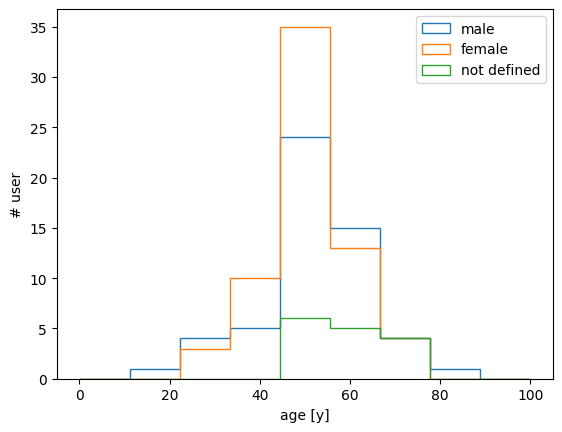

In [56]:
plt.hist(info[info['sex'] == 'male']['age'],bins=bins,histtype='step')
plt.hist(info[info['sex'] == 'female']['age'], bins = bins,histtype='step')
plt.hist(info[info['sex'] == 'nd']['age'], bins = bins,histtype='step')
plt.ylabel('# user')
plt.xlabel('age [y]')
plt.legend(['male', 'female', 'not defined']);

In [62]:
bins = np.linspace(10, 60, 20)

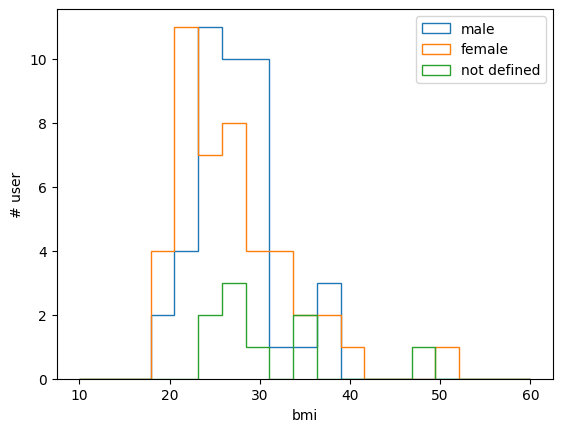

In [63]:
plt.hist(info[info['sex'] == 'male']['bmi'], bins = bins, histtype='step')
plt.hist(info[info['sex'] == 'female']['bmi'], bins = bins,histtype='step')
plt.hist(info[info['sex'] == 'nd']['bmi'], bins = bins,histtype='step')
plt.ylabel('# user')
plt.xlabel('bmi')
plt.legend(['male', 'female', 'not defined']);